<a href="https://colab.research.google.com/github/nahomHmichael/Restaurant-recommender-system/blob/main/Restaurant_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Installing packages on systems like ubuntu.
!apt install gdal-bin python-gdal python3-gdal 
# Understanding gdal: https://developers.planet.com/planetschool/getting-started-with-gdal/
!apt install python3-rtree 

#!pip install git+git://github.com/geopandas/geopandas.git
!pip install --upgrade geopandas

# Understanding GeoPandas: https://github.com/geopandas/geopandas
# Installing dependancies for geopandas
!pip install descartes 
!pip install folium 
!pip install plotly_express


Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 1s (2,538 kB/s)
Selecting previously unselected

In [3]:
import pandas as pd 
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

import folium

import plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
# Downloading the Yelp academic dataset
!wget https://www.dropbox.com/s/3x1w789mmuae3ao/yelp_academic_dataset_business.zip
!unzip yelp_academic_dataset_business.zip

--2022-07-23 08:35:11--  https://www.dropbox.com/s/3x1w789mmuae3ao/yelp_academic_dataset_business.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3x1w789mmuae3ao/yelp_academic_dataset_business.zip [following]
--2022-07-23 08:35:11--  https://www.dropbox.com/s/raw/3x1w789mmuae3ao/yelp_academic_dataset_business.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6b4d338802f1b0cf5c1249c130.dl.dropboxusercontent.com/cd/0/inline/Bpni743Lk2TGndnO0WpHksI6oK3fmZG3CLk8167iS_cpCUvxx5ZtWBm5AkkLyZdsyzZP_7px1dz7RlX_5tTAedWaau3k-5IWJMTRZlwakOJcN3vMX3As1NZx4rcIdcuBoIeYKpp-aFN_yUhDupX1qoEALKICS_7EVZfFWPVr3_31pg/file# [following]
--2022-07-23 08:35:12--  https://uc6b4d338802f1b0cf5c1249c130.dl.dropboxusercontent.com/cd/0/inline/B

In [5]:
df = pd.read_json('yelp_academic_dataset_business.json', lines=True)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   192609 non-null  object 
 1   name          192609 non-null  object 
 2   address       192609 non-null  object 
 3   city          192609 non-null  object 
 4   state         192609 non-null  object 
 5   postal_code   192609 non-null  object 
 6   latitude      192609 non-null  float64
 7   longitude     192609 non-null  float64
 8   stars         192609 non-null  float64
 9   review_count  192609 non-null  int64  
 10  is_open       192609 non-null  int64  
 11  attributes    163773 non-null  object 
 12  categories    192127 non-null  object 
 13  hours         147779 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


In [9]:
df.shape

(192609, 14)

# Exploratory DAta Analysis(EDA)

In [10]:
df['Restaurants'] = df['categories'].str.contains('Restaurants')
df.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurants
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None,False
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",True


In [11]:
df_restaurants = df.loc[df.Restaurants == True]
df_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurants
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",True
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",True
11,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",True
13,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",True
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",None,True


In [12]:
df_restaurants.shape

(59371, 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



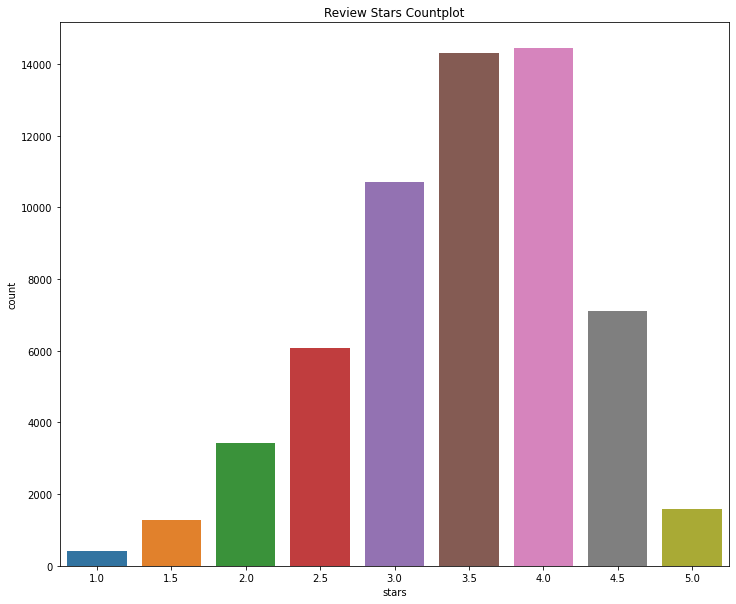

In [14]:
# Visualiazing the number of restuarants based on Review stars
fig, ax = plt.subplots(figsize=(12,10))
sns.countplot(df_restaurants['stars'], ax=ax)
plt.title('Review Stars Countplot')
# plt.savefig('stars.png')
plt.show()

In [15]:
top_restaurants = df_restaurants.sort_values(by=['review_count', 'stars'], ascending=False)[:20]
top_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurants
82250,4JNXUYY8wbaaDmk3BPzlWw,Mon Ami Gabi,3655 Las Vegas Blvd S,Las Vegas,NV,89109,36.112859,-115.172434,4.0,8348,1,"{'Corkage': 'True', 'RestaurantsDelivery': 'Fa...","Food, French, Breakfast & Brunch, Restaurants,...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",True
89206,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,3570 S Las Vegas Blvd,Las Vegas,NV,89109,36.116113,-115.176222,4.0,8339,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Buffets, Sandwiches, Food, Breakf...","{'Monday': '7:30-22:0', 'Tuesday': '7:30-22:0'...",True
35199,K7lWdNUhCbcnEvI0NhGewg,Wicked Spoon,3708 Las Vegas Blvd S,Las Vegas,NV,89109,36.109550,-115.176155,3.5,6708,1,"{'GoodForKids': 'True', 'RestaurantsPriceRange...","Buffets, Breakfast & Brunch, Restaurants","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...",True
58852,f4x1YBxkLrZg652xt2KR5g,Hash House A Go Go,3535 Las Vegas Blvd,Las Vegas,NV,89109,36.118181,-115.171580,4.0,5763,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Breakfast & Brunch, Food, Restaurants, America...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",True
141820,cYwJA2A6I12KNkm2rtXd5g,Gordon Ramsay BurGR,3667 Las Vegas Blvd S,Las Vegas,NV,89109,36.110724,-115.172169,4.0,5484,0,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Restaurants, Burgers, American (Traditional)","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...",True
